# Read ECG

Notebook for reading the ECG data files, and using some *wfdb* utils.

## Import useful libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import wfdb # For reading wfdb data

## Plotting ECG data

Functions from https://wfdb.readthedocs.io/en/latest/

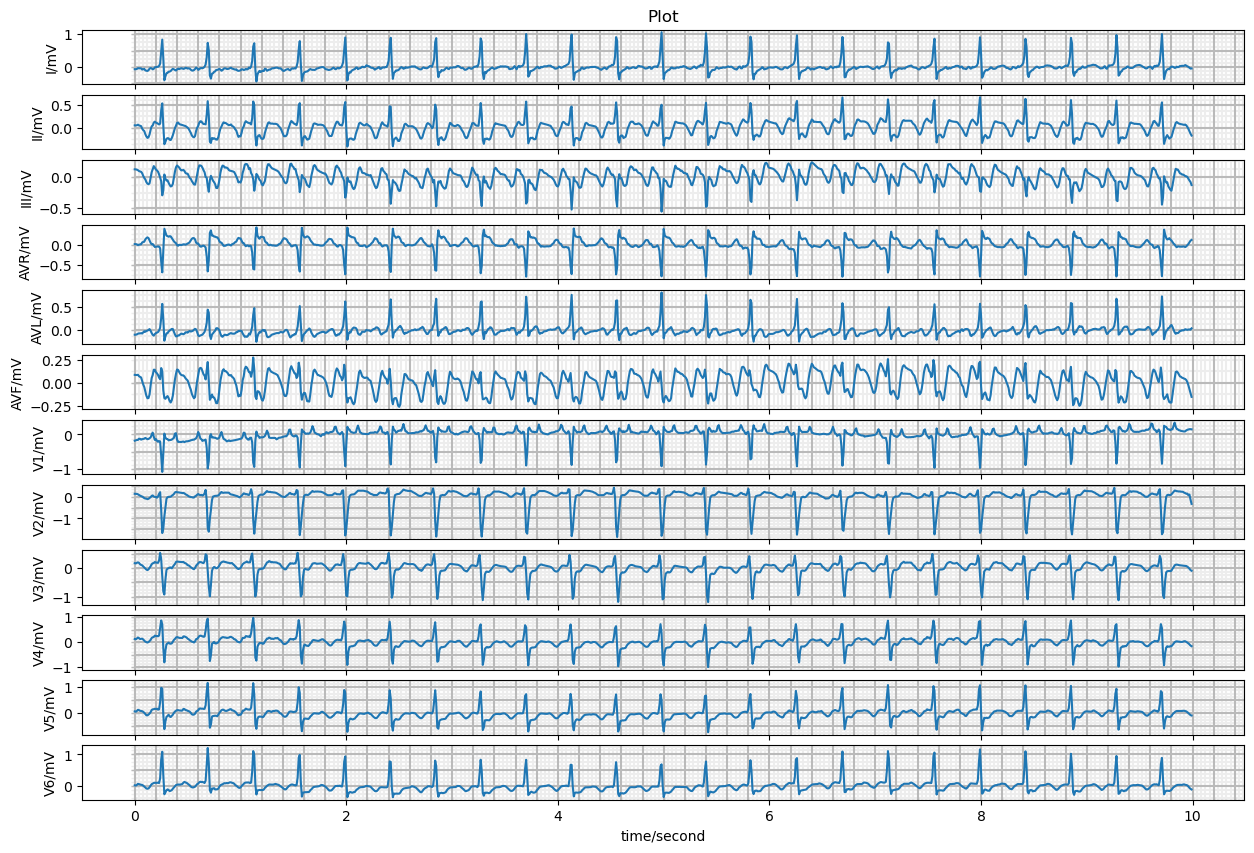

In [2]:
filepath = "data/records100/00000/" 
patient = "00020_lr" # Patient ID. Using patient 10 (arbitrarily)

rdrecord = wfdb.rdrecord(filepath + patient)
signal_data = rdrecord.p_signal.T
signa_name = rdrecord.sig_name
freq = rdrecord.fs

unit = rdrecord.units

wfdb.plot_wfdb(rdrecord,title="Plot",figsize=(15,10),ecg_grids="all")

### Looking at shorter timeframe

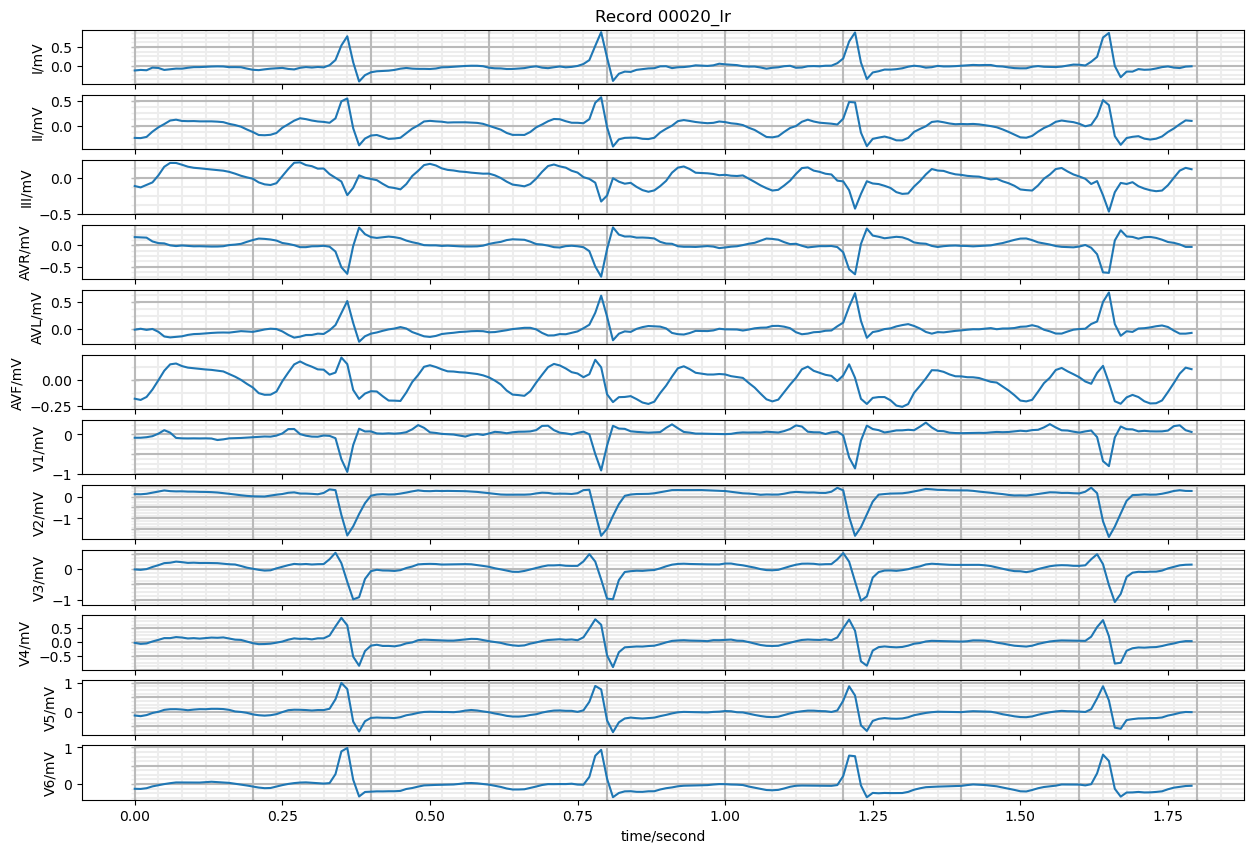

In [3]:
brief_record = wfdb.rdrecord(filepath+patient, sampfrom=120, sampto=300)
wfdb.plot_wfdb(brief_record,title=f"Record {patient}",figsize=(15,10),ecg_grids="all")

## Computing QRS
Using the *xqrs* algorithm from *wfdb*

In [4]:
import wfdb.processing # Import wfdb.processing explicitly (there is sometimes an import error otherwise)

In [5]:
sig, fields = wfdb.rdsamp(filepath + patient, channels=[0])

print("Fields: ", fields)

xqrs = wfdb.processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()

Fields:  {'fs': 100, 'sig_len': 1000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['I'], 'comments': []}
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


In [6]:
# Since I don't know much about this library, and the documentation was a bit confusing (to me)
# printing all attributes and methods of the xqrs object
print(dir(xqrs))

['Conf', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_backsearch', '_bandpass', '_is_qrs', '_is_twave', '_learn_init_params', '_mwi', '_require_backsearch', '_run_detection', '_set_conf', '_set_default_init_params', '_set_init_params', '_update_noise', '_update_qrs', 'backsearch_qrs_inds', 'conf', 'detect', 'fc_high', 'fc_low', 'filter_gain', 'fs', 'last_qrs_ind', 'last_qrs_peak_num', 'learned_init_params', 'mwi_gain', 'n_peaks_i', 'noise_amp_recent', 'peak_inds_i', 'peak_num', 'qrs_amp_recent', 'qrs_inds', 'qrs_radius', 'qrs_thr', 'qrs_thr_init', 'qrs_thr_min', 'qrs_width', 'ref_period', 'rr_init', 'rr_max', 'rr_min', 'rr_recent', 'sampfrom', 'sampto', 'sig', 'sig_f', 'sig_i', 'sig_len', '

In [7]:
qrs_inds = xqrs.qrs_inds
intervals = wfdb.processing.calc_rr(qrs_inds)
bpm = wfdb.processing.calc_mean_hr(intervals, fs=fields["fs"])

print(f"The approximated beat rate is {bpm:.2f} bpm")

The approximated beat rate is 139.68 bpm


In [8]:
hr = wfdb.processing.compute_hr(fields["sig_len"], qrs_inds, fs=fields["fs"])

In [9]:
# We could also annotate the signals
wfdb.processing.rr2ann(intervals, patient ,"atr",fields["fs"])
# The annotations are saved in the current directory (slashes are not valid characters)
# the os.cwd can be changed to be in the valid data folder

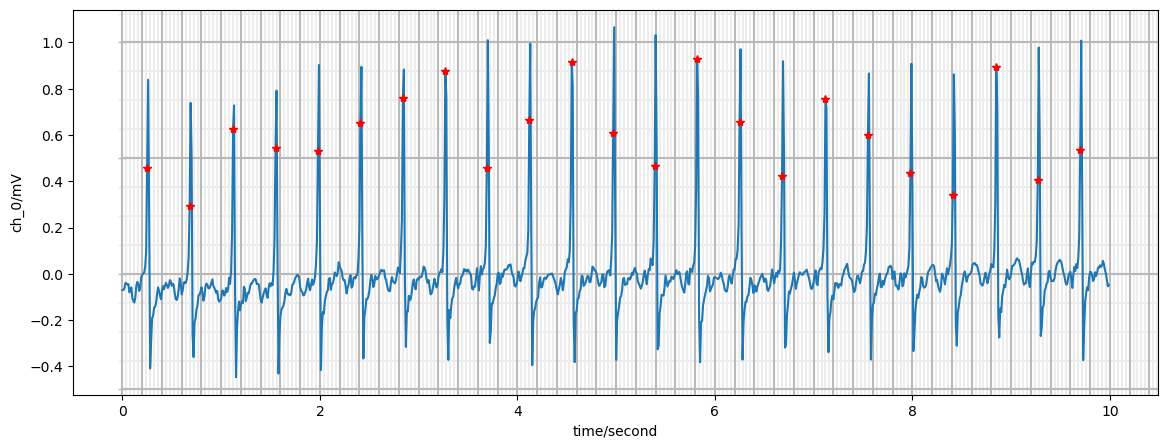

In [10]:
wfdb.plot.plot_items(signal=sig, ann_samp=[qrs_inds],figsize=(14,5),sig_units=rdrecord.units,ecg_grids=[0],fs=rdrecord.fs,time_units="seconds")